Eigentliche gute Vorhersage.
Jetzt mehr backcandles ausprobieren, hyperparamter anapassen. inputs wo 150 ist. möglichkeit weitere indikatoren oder wie auch immer.

PROBLEM: Warum das Modell einen Denkfehler hat: Das Modell lernt, dass der aktuelle closingprice nicht all zu weit vom nächsten closingpreis entfernt seien wird. Jeder vorhergesagte Wert der nah am Closingpreis des vorherigen Tages ist, sieht aus als sei er genau.
Es sieht gut aus aber man kann erkennen, dass vorhersage nur 1 Tag verzögerter tatsächlicher Wert ist.
Modell versucht Closing Preis des nächsten Tages vorherzusagen anhand vergangener Daten. Das wird für jeden Tag getestet und soll zukpünftige Werte vorherzusagen

Neuer Ansatz. Target ist der Unterschied zwischen Close der aktuellen Kerze zur nächsten Close Kerze. Es wird nun statt dem Closepreis des nächsten Tages vorherzusagen, versucht um wie viel der preis hoch oder runter geht. Wo ist der Unterschied? Nächster candle Price vs Preisbewegung.

In [1]:
# Importieren der Bibliotheken
import mlflow
import mlflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import ta



In [2]:
#.\venv\Scripts\activate

In [3]:
data = pd.read_csv("C:\WWI2021\Semester 6\Machine Learning Project\LSTM_BTC\data\BTC-USD.csv")
#data

In [4]:
data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()
data['EMA20'] = ta.trend.EMAIndicator(data['Close'], window=20).ema_indicator()
data['EMA100'] = ta.trend.EMAIndicator(data['Close'], window=100).ema_indicator()
data['EMA150'] = ta.trend.EMAIndicator(data['Close'], window=150).ema_indicator()


In [5]:
# Simple Moving Average (SMA)
data['SMA50'] = ta.trend.SMAIndicator(close=data['Close'], window=50).sma_indicator()
# Momentum Indicator
data['Momentum'] = ta.momentum.ROCIndicator(close=data['Close'], window=10).roc()
# Rate of Change (ROC)
data['ROC'] = ta.momentum.ROCIndicator(close=data['Close'], window=12).roc()
# Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=data['Close'], window=20, window_dev=2)
data['Bollinger_Middle'] = bollinger.bollinger_mavg()
data['Bollinger_Upper'] = bollinger.bollinger_hband()
data['Bollinger_Lower'] = bollinger.bollinger_lband()
# Moving Average Convergence Divergence (MACD)
macd = ta.trend.MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
data['MACD'] = macd.macd()


In [6]:
data.drop(['Date','High', 'Low', 'Adj Close', 'Volume','Open', 'EMA100', 'EMA150', 'SMA50', 'Momentum', 'ROC', 'Bollinger_Upper', 'Bollinger_Lower'], axis=1, inplace=True)
data['Previous_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)

X_train shape: (2426, 30, 6)
X_val shape: (693, 30, 6)
X_test shape: (348, 30, 6)
Reshaped X_train shape: (2426, 30, 6)
Reshaped X_val shape: (693, 30, 6)
Reshaped X_test shape: (348, 30, 6)
Epoch 1/30


c:\WWI2021\Semester 6\Machine Learning Project\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5398 - loss: 0.6913 - val_accuracy: 0.4877 - val_loss: 0.7012
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5401 - loss: 0.6901 - val_accuracy: 0.4877 - val_loss: 0.6981
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5314 - loss: 0.6919 - val_accuracy: 0.4848 - val_loss: 0.6972
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5649 - loss: 0.6841 - val_accuracy: 0.4877 - val_loss: 0.6953
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5338 - loss: 0.6901 - val_accuracy: 0.4892 - val_loss: 0.6959
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5508 - loss: 0.6884 - val_accuracy: 0.4848 - val_loss: 0.6953
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5476 - loss: 0.6875 - val_accuracy: 0.4949 - val_loss: 0.6950
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5359 - loss: 0.6887 - val_accuracy: 0.4921 - val_loss: 0.6952
Ep

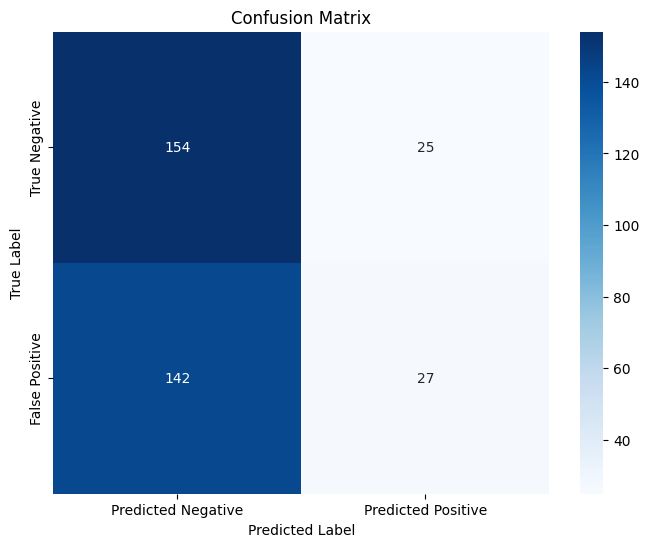

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Zielvariablen für die Vorhersage erstellen
data['Target'] = (data['Close'] <= data['Previous_Close']).astype(int)

data_clean = data
data_clean.dropna(inplace=True)
data_clean.reset_index(drop=True, inplace=True)

# Auswahl und Skalierung der relevanten Features
selected_features = ['Close', 'RSI', 'EMA20', 'Bollinger_Middle', 'MACD', 'Previous_Close']
sc = MinMaxScaler(feature_range=(0, 1))
scaled_features = sc.fit_transform(data[selected_features])

def create_sequences(features, target, seq_length):
    sequences = []
    labels = []
    for i in range(len(features) - seq_length):
        sequence = features[i:i + seq_length]
        label = target[i + seq_length]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Hyperparameter-Definition für den ersten Versuch
lr = 0.001
SEQ_LENGTH = 30
EPOCHS = 30
BATCH_SIZE = 32

# Daten vorbereiten basierend auf der aktuellen seq_length
X, y = create_sequences(scaled_features, data['Target'].values, SEQ_LENGTH)

# Datenaufteilung: 70% Training, 20% Validierung, 10% Test
train_size = int(0.7 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Überprüfen der Formen der Daten
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# Umformung der Daten für LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Überprüfen der Formen der Daten nach Umformung
print(f"Reshaped X_train shape: {X_train.shape}")
print(f"Reshaped X_val shape: {X_val.shape}")
print(f"Reshaped X_test shape: {X_test.shape}")

optimizer = Adam(learning_rate=lr)

# Modellarchitektur definieren
model = Sequential()
# Hinzufügen von LSTM-Schichten
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, len(selected_features))))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Modell trainieren
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))

# Modell bewerten
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Vorhersagen treffen und Wahrscheinlichkeiten in binäre Werte umwandeln
predictions = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix')
print(cm)

# Classification Report
cr = classification_report(y_test, predictions)
print('Classification Report')
print(cr)

# Berechnung der True Positives, True Negatives, False Positives und False Negatives
tn, fp, fn, tp = cm.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Plot der Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'False Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
